# MISSION 2. 

In [24]:
import pandas as pd
import numpy as np

character = pd.read_csv('../4W-5-mission/marvel/characters.csv')
stat = pd.read_csv('../4W-5-mission/marvel/charcters_stats.csv')
movies = pd.read_csv('../4W-5-mission/marvel/comics.csv')
crtr_info= pd.read_csv('../4W-5-mission/marvel/marvel_characters_info.csv')
marvel_dc_crtr = pd.read_csv('../4W-5-mission/marvel/marvel_dc_characters.csv',encoding='ISO-8859-1')
heros_stat = pd.read_csv('../4W-5-mission/marvel/superheroes_power_matrix.csv')


## Core mission
### 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [43]:
stat.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [41]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [44]:
stat.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [40]:
stat[stat['Total']==stat['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 2. 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [45]:
stat['Alignment'].unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

In [47]:
stat.dropna(axis=0,subset='Alignment',inplace=True)

In [49]:
stat[stat['Alignment']=='good']['Intelligence']

0      50
1      38
2      88
3      50
6      63
       ..
604    88
606    88
607    50
608    50
609    75
Name: Intelligence, Length: 432, dtype: int64

- 능력치 비교

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

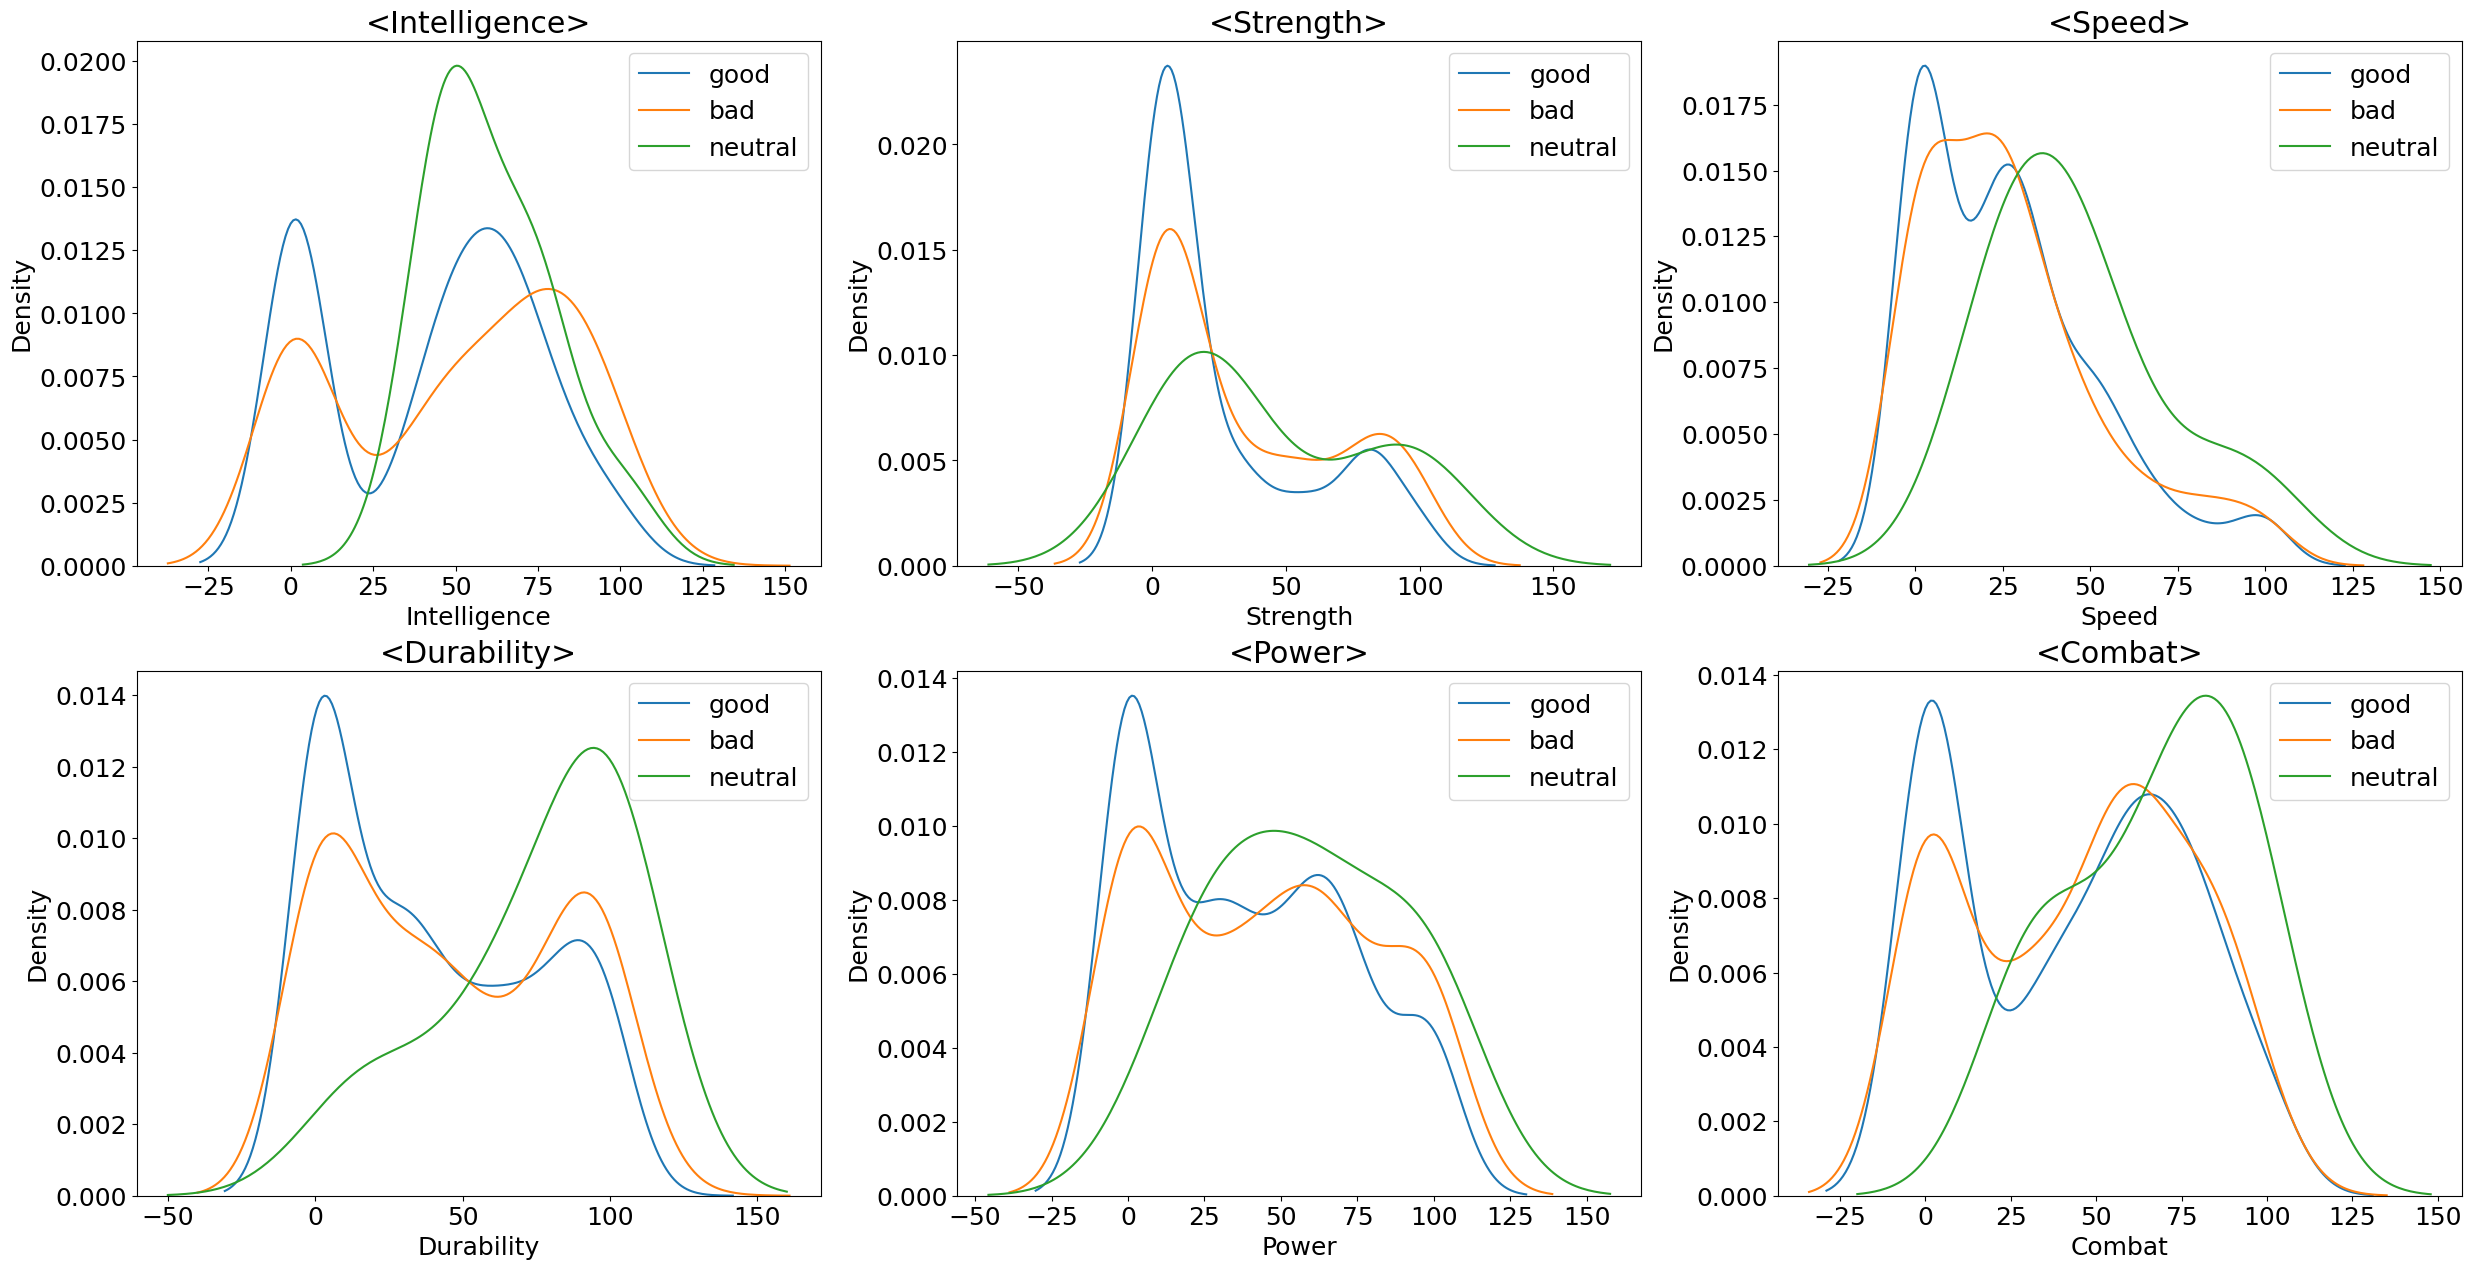

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(30,15))
ax1,ax2,ax3 = fig.add_subplot(2,3,1), fig.add_subplot(2,3,2), fig.add_subplot(2,3,3)
ax4,ax5,ax6 = fig.add_subplot(2,3,4), fig.add_subplot(2,3,5), fig.add_subplot(2,3,6)

cols = list(stat.columns[2:8])
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

#1
for col_name, ax in zip(cols,axs):
    ax.set_title('<'+col_name+'>')
    sns.kdeplot(x=stat[stat['Alignment']=='good'][col_name],ax=ax)
    sns.kdeplot(x=stat[stat['Alignment']=='bad'][col_name],ax=ax)
    sns.kdeplot(x=stat[stat['Alignment']=='neutral'][col_name],ax=ax)
    ax.legend(['good', 'bad', 'neutral'])


plt.show()